In [ ]:
#Installation of stop-words

!pip install stop-words


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Required packages

from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [ ]:
#Google Drive 

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Path to the document

filepath='/content/gdrive/My Drive/HDP & BDP/ALL.txt'
f = open(filepath)
doc = f.read()

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [ ]:
# compile sample documents into a list
doc_set = [doc]

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]


In [ ]:
#LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=20, id2word = dictionary, passes=20)

In [ ]:
!pip install pyLDAvis==2.1.2
import pyLDAvis.gensim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.294630 -0.011014       1        1  76.585723
8     -0.302981  0.001908       2        1  23.290713
16    -0.146043  0.024437       3        1   0.123035
0     -0.013416 -0.012200       4        1   0.000300
11     0.057563  0.000090       5        1   0.000014
18     0.048751  0.001085       6        1   0.000014
17     0.054655  0.000451       7        1   0.000014
15     0.049742  0.001016       8        1   0.000014
14     0.055959  0.000337       9        1   0.000014
12     0.053798  0.000560      10        1   0.000014
10     0.037514  0.001537      11        1   0.000014
1      0.053663  0.000645      12        1   0.000014
9      0.055686  0.000348      13        1   0.000014
7      0.058434 -0.000005      14        1   0.000014
6      0.055086  0.000402      15        1   0.000014
5     -0.016546 -0.013836      16        1   0.000014
4      0.055431  0.000364      17        1   0.000014
3      0.048633  0.001146      18        1   0.000014
2      0.039254  0.001676      19        1   0.000014
19     0.049447  0.001052      20        1   0.000014, topic_info=        Term         Freq        Total Category  logprob  loglift
8862    will  7383.000000  7383.000000  Default  30.0000  30.0000
6149   peopl  5213.000000  5213.000000  Default  29.0000  29.0000
7024       s  4521.000000  4521.000000  Default  28.0000  28.0000
7120     say  3037.000000  3037.000000  Default  27.0000  27.0000
8339  turkey  2925.000000  2925.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
5418  minist     0.000009  1197.296934  Topic20  -8.6435  -2.9611
7699   state     0.000009  1365.982311  Topic20  -8.6357  -3.0851
2372     day     0.000009  1632.109793  Topic20  -8.6274  -3.2548
6129    peac     0.000009  1488.008648  Topic20  -8.6345  -3.1694
4985     let     0.000009  1356.617572  Topic20  -8.6444  -3.0869

[1481 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
48        3  1.076855    1200
60        2  0.855394     129
61        2  0.855744    12th
161       2  0.918043    1970
188       3  1.524278    19th
...     ...       ...     ...
8975      2  0.223397    year
8975      3  0.000709    year
9059      1  0.933847  zgecan
9095      1  0.935984   çorum
9104      2  0.858369     ìwe

[310 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 9, 17, 1, 12, 19, 18, 16, 15, 13, 11, 2, 10, 8, 7, 6, 5, 4, 3, 20])

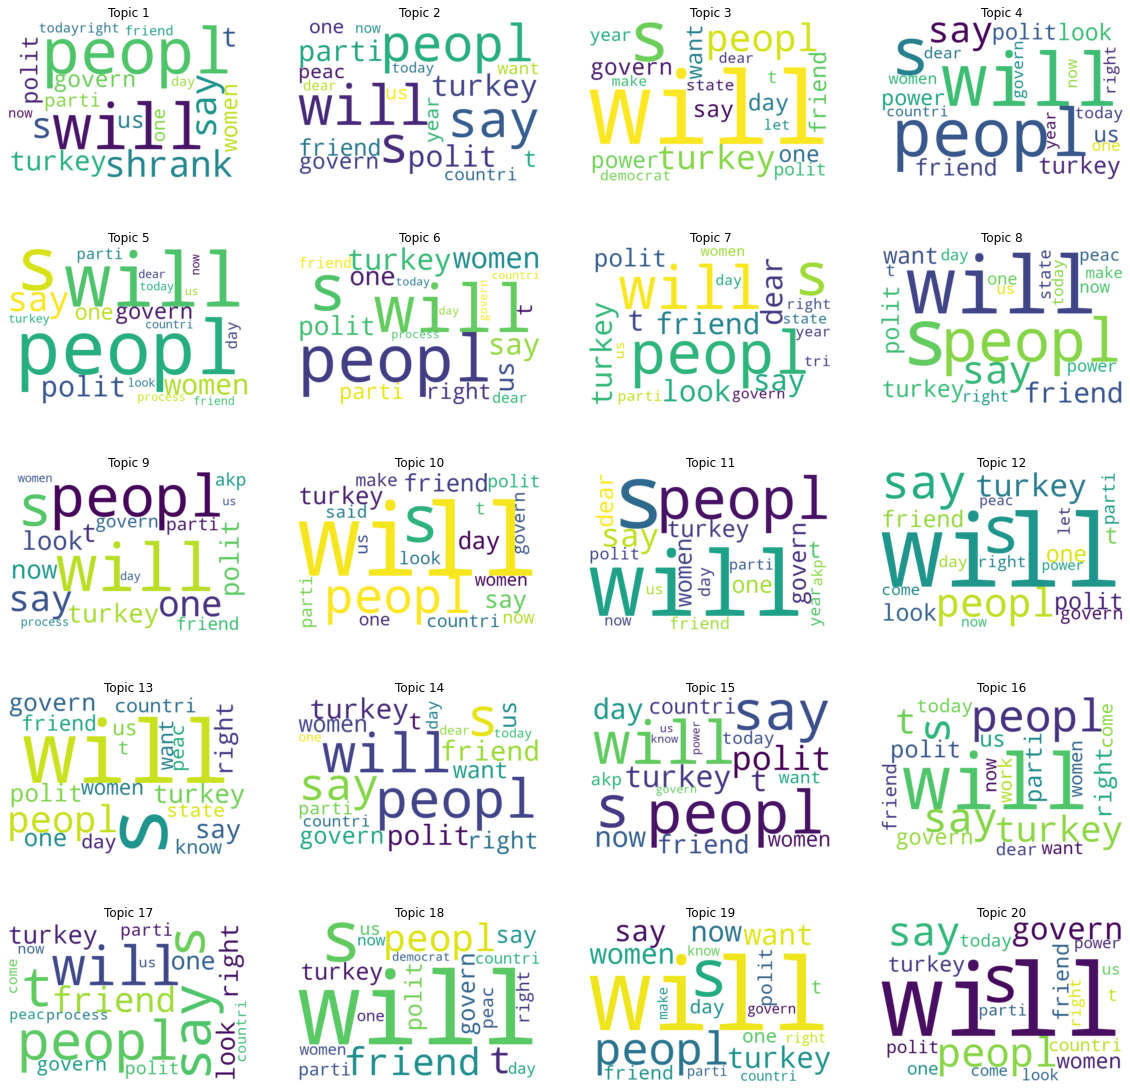

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of lists where each sublist contains the top 20 words for a topic
top_words = [[word for word, _ in ldamodel.show_topic(topic_id, topn=20)] for topic_id in range(ldamodel.num_topics)]

# Create a figure with subplots
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.ravel()

# Create a word cloud for each topic and display it in a subplot
for i, ax in enumerate(axes):
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(" ".join(top_words[i]))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title("Topic {}".format(i+1))
    ax.axis("off")

plt.show()